# Assignment 4
Course: 2DV506 

Author: Christoffer Eid

Student code: ce223af

Teacher: Jonas Nordqvist, Rafael M. Martinez 

## Excercise 1
#### Clustering


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

def bkmeans(X, k:int, iterations:int, rnd_state=1):
    X_ = np.c_[X, np.zeros(len(X))]
    for c in range(k-1):
        # Finds most common label in X_.
        values, counts = np.unique(X_, return_counts=True)
        ind = np.argmax(counts)
        # Retrieves largest cluster of X_ using most common label.
        max_cluster = X_[X_[:, 2]==values[ind]][:, :2]
        # Splits largest cluster into 2 using kmeans.
        label_split = KMeans(n_clusters=2, random_state=rnd_state, n_init=iterations).fit_predict(max_cluster)
        max_cluster = np.c_[max_cluster, label_split]
        # Defining one of the newly splitted clusters.
        split = max_cluster[max_cluster[:, 2] == 1][:, :2]
        # Retrieving indices from X_ where newly split cluster is. 
        indices = np.unique(np.where(split[:, None] == X[None, :])[1])
        # Giving the newly split cluster in X_ a unique label.
        X_[indices, 2] = c+1
    return X_[:, 2]


In [ ]:
K = 6
I = 10
X, y = make_blobs(random_state=3, centers=10, n_samples=1000)

plt.scatter(X[:, 0], X[:, 1], c=bkmeans(X, K, I))
plt.show()

## Exercise 2 
#### Non-linear Dimensionality Reduction

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs, make_s_curve
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt

def sammon(X:np.ndarray, iterations:int=100, error_threshold:float=0.023, learning_rate:float=1, verbose:bool=False, plot_steps:bool=False) -> np.ndarray:
    """Sammon mapping.

    Args:
        X (np.ndarray): n x p matrix to reduce to n x 2.
        iterations (int, optional): Max number of iterations. Defaults to 100.
        error_threshold (float, optional): The error value to stop at. Defaults to 0.023.
        learning_rate (float, optional): The rate at which the algorithm 'jumps'. Defaults to 1.
        verbose (bool, optional): Wheter to print results for each step or not. Defaults to False.
        plot_steps (bool, optional): Wheter to plot every tenth step or not. Defaults to False.

    Returns:
        np.ndarray: n x 2 representation of X.
    """    
    print("Running Sammon mapping...")
    Y = make_blobs(n_samples=X.shape[0], n_features=2, random_state=1337)[0]
    plt.figure()
    plt.title("Original Y")
    plt.scatter(Y[:, 0], Y[:, 1])
    d_ = pairwise_distances(X)
    d_ = np.where(d_!= 0, d_, 1e-100)
    c = d_.sum()
    for iteration in range(iterations):
        d = pairwise_distances(Y)
        d = np.where(d!= 0, d, 1e-100)
        E = (1/c)*np.sum(np.square(d-d_)/d_)
        if E < error_threshold:
            print(f"Stopped at iteration {iteration} because error threshold was reached at {E}.")
            plt.figure()
            plt.title(f"Final plot at iteration {iteration}")
            plt.scatter(Y[:, 0], Y[:, 1])
            break
        for i in range(len(Y)):
            first_part = 0
            second_part = 0
            for j in range(len(Y)):
                if i == j:
                    continue
                first_part += ((d_[i,j]-d[i,j]) / (d[i,j]*d_[i,j])) * (Y[i,:]-Y[j,:])
                second_part += (1 / (d_[i,j]*d[i,j])) * ((d_[i,j]-d[i,j]) - (((Y[i,:]-Y[j,:])**2) / d[i,j]) * (1 + ((d_[i,j]-d[i,j]) / d[i,j])))
            first_derivate = (-2/c) * first_part
            second_derivate = (-2/c) * second_part
            delta = first_derivate/np.abs(second_derivate)
            Y[i,:] = Y[i,:] - (learning_rate * delta)
        if verbose:
            print(f"Iteration: {iteration}, Error: {E}")
        if iteration % 10 == 0 and iteration != 0 and plot_steps:
            plt.figure()
            plt.title(f"Iteration {iteration}")
            plt.scatter(Y[:, 0], Y[:, 1])
    return Y

In [ ]:
X = make_s_curve(random_state=1, n_samples=300)[0]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(10,280)
ax.title.set_text("Original X")
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
Y = sammon(X, verbose=False, plot_steps=False)
plt.show()

## Exercise 3
#### Visualization of Results

### Excercise 3.1
##### Comparison of DR Techniques

**VG Sales**  
Graphs were most interesting for this dataset, I'd say since the results were very different.  
*PCA* drew lines coming from the bottom of the graph. Some of the lines kind of had a theme going, but I'd say that most of them were quite random, i.e. not good clustering.  
*TSNE* created a firework looking graph where (again) some tendencies could be spotted if you really wanted to, but most of the clusters seemed quite random in their class distribution.  
*Sammon* created one big cluster, with a few outliers. Not very impressive.  
For VG Sales I'd crown either PCA or TSNA the victors. However, neither did particularly well.   

**GPU Specs**  
*PCA* generated some lines again, this time 3 of varying size. The topmost line being the largest became all the more yellow the further right you go. Second line is basically all green, and third line is of varying random classes. All in all allright, I suppose.  
*TSNE* Again quite a good spread on the points, not the most obvioud clusters but some grouping is definetly happening.   
*Sammon* generated a circle in the middle of the graph where most points are then a few outliers in the edges of the graph. You can kind of differentiate two clusters between AMD and NVIDIA in the circle, but thats really pushing it, I'd say.   
TSNE is the best in this category.  

**Card Transit Fraud**  
*PCA* Everything squished to the bottom left corner. Maybe one could argue that 'Fraud' is more ssquished than 'Straight'. Not a good result either way.  
*TSNE* generates a massive half circle here with straight kind of differentiated compared to the frauds.   
*Sammon* We've got some kind of separation between the two classes on the right/left side of the cluster in the middle. But again, it's not very impressive.   
All in all I'd say that TSNE takes this one too. 

None of the data sets that I had seemed easier than another to separate the classes from eachother. Alot seemed to come down to which DR technique was used, rather. I.e. they all perfomed very differently on different data sets.  

![Result from 3.1](img\e3-1.svg)

In [ ]:
import warnings
import numpy  as np
import pandas as pd
from sklearn.datasets      import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold      import TSNE
from sklearn.metrics       import pairwise_distances
from sklearn.preprocessing import LabelEncoder
from matplotlib            import pyplot as plt

warnings.filterwarnings(action='ignore', category=FutureWarning)

def sammon(X:np.ndarray, iterations:int=100, error_threshold:float=0.023, learning_rate:float=1, verbose:bool=False, plot_steps:bool=False) -> np.ndarray:
    """Sammon mapping.

    Args:
        X (np.ndarray): n x p matrix to reduce to n x 2.
        iterations (int, optional): Max number of iterations. Defaults to 100.
        error_threshold (float, optional): The error value to stop at. Defaults to 0.023.
        learning_rate (float, optional): The rate at which the algorithm 'jumps'. Defaults to 1.
        verbose (bool, optional): Wheter to print results for each step or not. Defaults to False.
        plot_steps (bool, optional): Wheter to plot every tenth step or not. Defaults to False.

    Returns:
        np.ndarray: n x 2 representation of X.
    """    
    print("Running Sammon mapping...")
    Y = make_blobs(n_samples=X.shape[0], n_features=2, random_state=1337)[0]
    d_ = pairwise_distances(X)
    d_ = np.where(d_!= 0, d_, 1e-100)
    c = d_.sum()
    for iteration in range(iterations):
        d = pairwise_distances(Y)
        d = np.where(d!= 0, d, 1e-100)
        E = (1/c)*np.sum(np.square(d-d_)/d_)
        if E < error_threshold:
            print(f"Stopped at iteration {iteration} because error threshold was reached at {E}.")
            break
        for i in range(len(Y)):
            first_part = 0
            second_part = 0
            for j in range(len(Y)):
                if i == j:
                    continue
                first_part += ((d_[i,j]-d[i,j]) / (d[i,j]*d_[i,j])) * (Y[i,:]-Y[j,:])
                second_part += (1 / (d_[i,j]*d[i,j])) * ((d_[i,j]-d[i,j]) - (((Y[i,:]-Y[j,:])**2) / d[i,j]) * (1 + ((d_[i,j]-d[i,j]) / d[i,j])))
            first_derivate = (-2/c) * first_part
            second_derivate = (-2/c) * second_part
            delta = first_derivate/np.abs(second_derivate)
            Y[i,:] = Y[i,:] - (learning_rate * delta)
        if verbose:
            print(f"Iteration: {iteration}, Error: {E}")
        if iteration % 10 == 0 and iteration != 0 and plot_steps:
            plt.figure()
            plt.title(f"Iteration {iteration}")
            plt.scatter(Y[:, 0], Y[:, 1], marker='.')
    return Y

def dr_techniques(X:np.ndarray, a:float=1.0, iterations:int=50):
    Y = PCA(n_components=2, random_state=1).fit_transform(X)
    Z = TSNE(learning_rate='auto').fit_transform(X)
    Q = sammon(X, verbose=False, plot_steps=False, error_threshold=0.01, learning_rate=a, iterations=iterations)
    return Y,Z,Q
    
def generate_data(dataset:str) -> np.ndarray:
    return pd.read_csv('datasets/' + dataset + '.csv', delimiter=';').dropna().to_numpy()

In [ ]:
vg_data = generate_data('vgsales')
vg_le = LabelEncoder()
vg_data[:, 0] = vg_le.fit_transform(vg_data[:, 0])
vg_X, vg_y = vg_data[:1000, 1:], vg_data[:1000, 0]

gpu_data = generate_data('gpu_specs_v6')
gpu_le = LabelEncoder()
gpu_data[:, -2] = gpu_le.fit_transform(gpu_data[:, -2])
gpu_data[:, -1] = gpu_le.fit_transform(gpu_data[:, -1])
gpu_X = gpu_data[:1000, :-1]
gpu_y = gpu_data[:1000, -1]

card_data = generate_data('card_transdata')
card_X = card_data[:1000, :-1]
card_y = card_data[:1000, -1]

data = {'vg_sales':np.c_[vg_X, vg_y], 'gpu_specs':np.c_[gpu_X, gpu_y], 'card_transit_fraud':np.c_[card_X, card_y]}
classes = {'vg_sales':vg_le.classes_.tolist(), 'gpu_specs':gpu_le.classes_.tolist(), 'card_transit_fraud':['Fraud', 'Straight']}

In [ ]:
for i, (k, v) in enumerate(data.items()):
    pca, tsne, sammon_ = dr_techniques(v[:, :-1])
    techniques = {'pca':pca, 'tsne':tsne, 'sammon':sammon_}
    for j, (key, value) in enumerate(techniques.items()):
        plt.subplot(3, 3, (i * 3) + j + 1)
        plt.title(f"{k} {key}")
        scatter = plt.scatter(value[:, 0], value[:, 1], c=v[:, -1], marker='.', cmap='Set3')
        plt.legend(handles=scatter.legend_elements()[0], labels=classes.get(k))
plt.show()

### Excercise 3.2
##### Comparison of Clustering Techniques

I'd say that hierarchial clustering performs the best as a clustering technique. Both k-means techniques overly focuses on having equal sized clusters as a result of their algorithm calculating cost based of the distance to the clusters centroid, and not as the distance between the points themselves. I'd say the kmeans algorithms would work better in a case were the classes were more evenly distributed distance-wise. In my datasets the classes are not, hence hierarcial clusterings point to point distance based clustering perfoms better. However, neither technique does well in terms of predicting the correct labels. I'd say this is because the dimensionality reduction techniques did such a poor job in the step before. Leaving no chance for the clustering techniques to perform. 
Generally you'd expect bisecting kmeans to outperfrom a hierarchial clustering technique where the number of labels are low compared to the data size (the card transit set). And it might have, if the DR-techniques didn't perform as poorly as they did.  On the other sets its quite hard to see which techniques performed better, but I'd say that hierarchial draws cleaner lines between the groups of points, whereas both the kmeans techniques draw borders straight through (what seems to be) clusters at times.

Graphs look somewhat different compared to the excercise before since I added more data because this time we didn't have to go through all the iterations of sammon.

![Result excercise 3.2](img\e3-2.svg)

In [2]:
import warnings
import numpy      as np
import pandas     as pd
import seaborn    as sns
import matplotlib as mpl
from sklearn.cluster       import AgglomerativeClustering, KMeans
from sklearn.manifold      import TSNE
from sklearn.preprocessing import LabelEncoder
from matplotlib            import pyplot as plt

warnings.filterwarnings(action='ignore', category=FutureWarning)

def generate_data(dataset:str) -> np.ndarray:
    return pd.read_csv('datasets/' + dataset + '.csv', delimiter=';').dropna().to_numpy()

def bkmeans(X, k:int, iterations:int, rnd_state=1):
    X_ = np.c_[X, np.zeros(len(X))]
    for c in range(k-1):
        # Finds most common label in X_.
        values, counts = np.unique(X_, return_counts=True)
        ind = np.argmax(counts)
        # Retrieves largest cluster of X_ using most common label.
        max_cluster = X_[X_[:, 2]==values[ind]][:, :2]
        # Splits largest cluster into 2 using kmeans.
        label_split = KMeans(n_clusters=2, random_state=rnd_state, n_init=iterations).fit_predict(max_cluster)
        max_cluster = np.c_[max_cluster, label_split]
        # Defining one of the newly splitted clusters.
        split = max_cluster[max_cluster[:, 2] == 1][:, :2]
        # Retrieving indices from X_ where newly split cluster is. 
        indices = np.unique(np.where(split[:, None] == X[None, :])[1])
        # Giving the newly split cluster in X_ a unique label.
        X_[indices, 2] = c+1
    return X_[:, 2]


In [3]:

vg_data = generate_data('vgsales')
vg_le = LabelEncoder()
vg_data[:, 0] = vg_le.fit_transform(vg_data[:, 0])
vg_X, vg_y = vg_data[:, 1:], vg_data[:, 0]

gpu_data = generate_data('gpu_specs_v6')
gpu_le = LabelEncoder()
gpu_data[:, -2] = gpu_le.fit_transform(gpu_data[:, -2])
gpu_data[:, -1] = gpu_le.fit_transform(gpu_data[:, -1])
gpu_X = gpu_data[:, :-1]
gpu_y = gpu_data[:, -1]

card_data = generate_data('card_transdata')
card_X = card_data[:, :-1]
card_y = card_data[:, -1]

data = {'vg_sales':np.c_[vg_X, vg_y], 'gpu_specs':np.c_[gpu_X, gpu_y], 'card_transit_fraud':np.c_[card_X, card_y]}
classes = {'vg_sales':vg_le.classes_.tolist(), 'gpu_specs':gpu_le.classes_.tolist(), 'card_transit_fraud':['Fraud', 'Straight']}


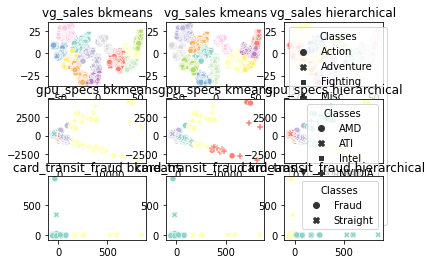

In [4]:

for i, (k, v) in enumerate(data.items()):
    tsne = TSNE(learning_rate='auto').fit_transform(v[:, :-1])
    n_clusters = len(np.unique(v[:, -1]))
    bkmeans_ = bkmeans(tsne, k=n_clusters, iterations=10)
    kmeans = KMeans(random_state=1, n_clusters=n_clusters).fit_predict(tsne) 
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters).fit_predict(tsne)
    techniques = {'bkmeans':bkmeans_, 'kmeans':kmeans, 'hierarchical':hierarchical}
    for j, (key, value) in enumerate(techniques.items()):
        plt.subplot(3, 3, (i * 3) + j + 1)
        plt.title(f"{k} {key}")
        df = pd.DataFrame({'x':tsne[:, 0], 'y':tsne[:, 1], 
                           'true':v[:, -1], 'predict':value})
        cmap = mpl.cm.Set3
        ax = sns.scatterplot(data=df, x='x', y='y', hue='predict', 
                             style='true', palette=list(cmap.colors)[:n_clusters])
        ax.set(xlabel=None, ylabel=None)
        ax.legend().remove()

    handles = ax.get_legend_handles_labels()[0]
    ax.legend(handles[int(len(handles)/2)+1:len(handles)], 
                classes.get(k), title='Classes')

plt.show()